In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import GridEnv
from dqn import DQN
from cnn import CNN
from cnn_dueling import DuelingCNN

from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch

In [2]:
MAZE = np.array([
    [ 1.,  0.,  1.,  1.],
    [ 1.,  1.,  1.,  0.],
    [ 0.,  0.,  1.,  1.],
    [ 1.,  0.,  1.,  0.],
])

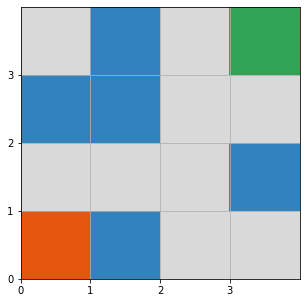

In [3]:
env = GridEnv(
    maze=MAZE.copy(),
    is_stochastic=False,
    action_transitions={
        'w': 1,
        's': 1,
        'd': 1,
        'a': 1,
    },
    max_timesteps=100,
    img_state=True,
    greyscale=True,
    img_size=(64, 64),
)

In [4]:
target_net = DuelingCNN(
    img_dim=1 if env.greyscale else 3,
    w=env.img_size[0],
    h=env.img_size[1],
    input_dim=np.prod(env.img_size),
    output_dim=env.n_actions,
)

policy_net = DuelingCNN(
    img_dim=1 if env.greyscale else 3,
    w=env.img_size[0],
    h=env.img_size[1],
    input_dim=np.prod(env.img_size),
    output_dim=env.n_actions,
)

dqn = DQN(
    env=env,
    log_freq=20,
    train_freq=3,
    batch_size=10,
    w_sync_freq=10,
    memory_size=100,
    epsilon_start=0.8,
    epsilon_decay=0.990,
    gamma=0.9,
    step_size=0.001,
    episodes=500,
    target_net=target_net,
    policy_net=policy_net,
    loss_func=nn.MSELoss(),
    optimizer=torch.optim.Adam(policy_net.parameters(), lr=0.01),
    load_pretrained=False,
    save_pretrained=False,
    model_path='../models/dqn_with_dueling',
)

dqn.run()

Episode: 0, Reward: -337.1000000000002, Loss: 0
Episode: 20, Reward: -32.849999999999994, Loss: 14.752673149108887
Episode: 40, Reward: -47.95, Loss: 14.645426750183105
Episode: 60, Reward: -12.800000000000004, Loss: 13.44688892364502
Episode: 80, Reward: 4.75, Loss: 1.1373889446258545
Episode: 100, Reward: -2.9499999999999975, Loss: 4.650132179260254
Episode: 120, Reward: 4.75, Loss: 3.512331008911133
Episode: 140, Reward: 3.9, Loss: 5.739126682281494
Episode: 160, Reward: -57.800000000000004, Loss: 5.487059116363525
Episode: 180, Reward: 4.75, Loss: 1.5604504346847534
Episode: 200, Reward: 4.75, Loss: 1.8811767101287842
Episode: 220, Reward: 4.75, Loss: 1.8717477321624756
Episode: 240, Reward: 3.9, Loss: 5.426792144775391
Episode: 260, Reward: 4.75, Loss: 0.976542055606842
Episode: 280, Reward: 4.75, Loss: 0.36586761474609375
Episode: 300, Reward: 4.75, Loss: 0.21508049964904785
Episode: 320, Reward: 4.75, Loss: 1.2202370166778564
Episode: 340, Reward: 3.05, Loss: 1.546015977859497
E

In [5]:
dqn.evaluate()

In [6]:
target_net = DuelingCNN(
    img_dim=1 if env.greyscale else 3,
    w=env.img_size[0],
    h=env.img_size[1],
    input_dim=np.prod(env.img_size),
    output_dim=env.n_actions,
)

policy_net = DuelingCNN(
    img_dim=1 if env.greyscale else 3,
    w=env.img_size[0],
    h=env.img_size[1],
    input_dim=np.prod(env.img_size),
    output_dim=env.n_actions,
)

dqn_dueling = DQN(
    env=env,
    log_freq=20,
    train_freq=3,
    batch_size=10,
    w_sync_freq=10,
    memory_size=100,
    epsilon_start=0.8,
    epsilon_decay=0.990,
    gamma=0.9,
    step_size=0.001,
    episodes=500,
    target_net=target_net,
    policy_net=policy_net,
    loss_func=nn.MSELoss(),
    optimizer=torch.optim.Adam(policy_net.parameters(), lr=0.01),
    load_pretrained=False,
    save_pretrained=False,
    model_path='../models/dqn_with_dueling',
)

In [7]:
dqn_dueling.run()

Episode: 0, Reward: -45.35, Loss: 0
Episode: 20, Reward: -279.0499999999997, Loss: 69.75387573242188
Episode: 40, Reward: -104.9499999999999, Loss: 30.891069412231445
Episode: 60, Reward: 1.3499999999999996, Loss: 7.112440586090088
Episode: 80, Reward: -26.050000000000004, Loss: 23.329803466796875
Episode: 100, Reward: -46.14999999999999, Loss: 14.337568283081055
Episode: 120, Reward: 4.7, Loss: 3.5799951553344727
Episode: 140, Reward: -41.849999999999994, Loss: 5.2900896072387695
Episode: 160, Reward: 4.75, Loss: 1.5413206815719604
Episode: 180, Reward: 4.75, Loss: 2.034954071044922
Episode: 200, Reward: 4.75, Loss: 0.7003216743469238
Episode: 220, Reward: 4.75, Loss: 0.911857545375824
Episode: 240, Reward: 4.75, Loss: 0.6928544044494629
Episode: 260, Reward: 4.75, Loss: 0.14011700451374054
Episode: 280, Reward: 4.75, Loss: 2.1914405822753906
Episode: 300, Reward: 4.75, Loss: 4.325667858123779
Episode: 320, Reward: 4.75, Loss: 1.3473212718963623
Episode: 340, Reward: 4.75, Loss: 0.868

In [8]:
dqn_dueling.evaluate()

#### Training

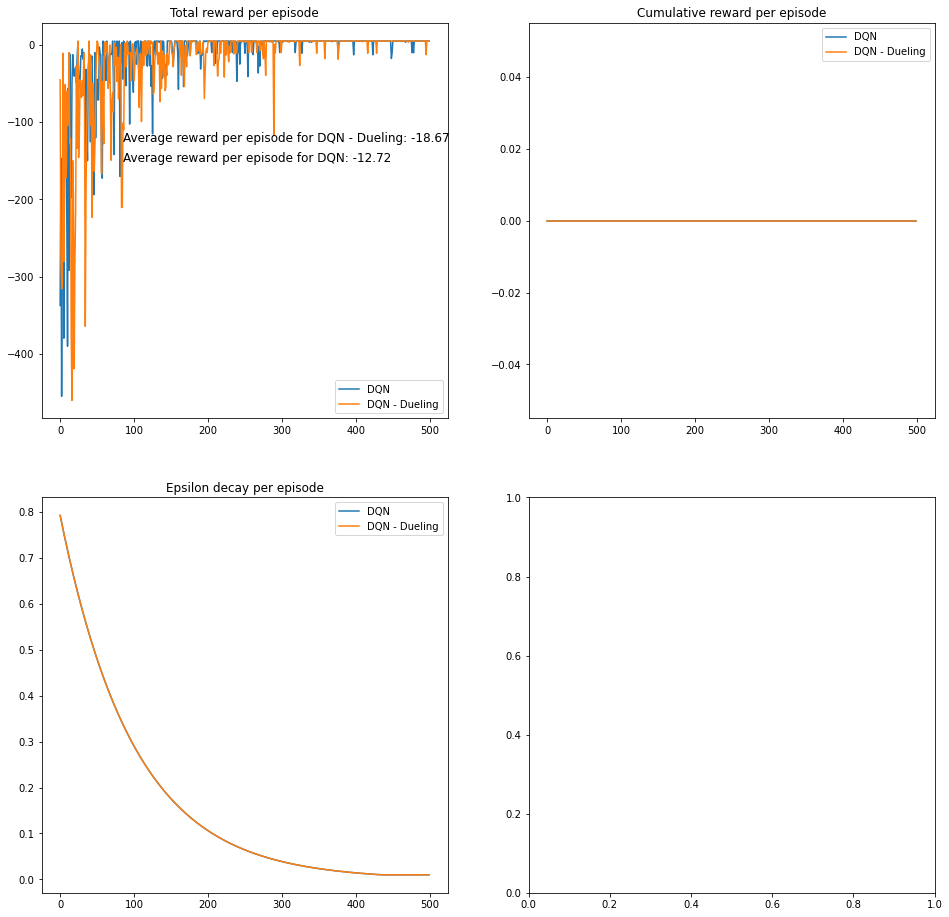

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16))  

total_rewards = [log['reward'] for _, log in dqn.logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0][0].plot(range(dqn.episodes), total_rewards, label='DQN')
ax[0][0].text(0.2, 0.65, f'Average reward per episode for DQN: {round(mean_rewards, 2)}', transform=ax[0][0].transAxes, size='large')
ax[0][0].set_title('Total reward per episode')
ax[0][0].legend()

cumulative_rewards = [log['cumulative_reward'] for _, log in dqn.logs.items()]
ax[0][1].plot(range(dqn.episodes), cumulative_rewards, label='DQN')
ax[0][1].set_title('Cumulative reward per episode')
ax[0][1].legend()

ax[1][0].plot(range(dqn.episodes), [log['epsilon'] for _, log in dqn.logs.items()], label='DQN')
ax[1][0].set_title('Epsilon decay per episode')
ax[1][0].legend()


total_rewards_du = [log['reward'] for _, log in dqn_dueling.logs.items()]
mean_rewards_du = sum(total_rewards_du)/len(total_rewards_du)
ax[0][0].plot(range(dqn_dueling.episodes), total_rewards_du, label='DQN - Dueling')
ax[0][0].text(0.2, 0.7, f'Average reward per episode for DQN - Dueling: {round(mean_rewards_du, 2)}', transform=ax[0][0].transAxes, size='large')
ax[0][0].set_title('Total reward per episode')
ax[0][0].legend()

cumulative_rewards_du = [log['cumulative_reward'] for _, log in dqn_dueling.logs.items()]
ax[0][1].plot(range(dqn_dueling.episodes), cumulative_rewards_du, label='DQN - Dueling')
ax[0][1].set_title('Cumulative reward per episode')
ax[0][1].legend()

ax[1][0].plot(range(dqn_dueling.episodes), [log['epsilon'] for _, log in dqn_dueling.logs.items()], label='DQN - Dueling')
ax[1][0].set_title('Epsilon decay per episode')
ax[1][0].legend()